<a href="https://colab.research.google.com/github/riyashah29/MlExps/blob/main/Experiment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Riya Shah    
Roll No.: D085  
SAP ID: 60009230017  
Branch: CSE DS-2-1

Aim: Evaluate the performance of boosting algorithm (AdaBoost) with different base learners and hyperparameter tuning.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
abc=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9333333333333333


#Base classes

In [ ]:
#do it on naiva bayes
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
abc=AdaBoostClassifier(n_estimators=50,estimator=NB,learning_rate=1)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9555555555555556


#Create synthetic dataset

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
model=AdaBoostClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores=cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores),std(n_scores)))

Accuracy: 0.798 (0.034)


In [ ]:
X,y=make_classification(n_samples=10000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
model=AdaBoostClassifier()
model.fit(X,y)

AdaBoostClassifier()

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# Print only the first 10 rows
print(X[:10])

[[-3.37249794  2.22733466 -2.10117906 -1.304638   -5.06610412 -1.65556825  0.77794715 -7.35670691  1.09386121  8.14451233 -0.22832769 -1.52766563 -1.16575545 -1.78072734  1.86456576  1.56372495  2.7712734  -2.69117567 -0.54101815  0.34208108]
 [ 2.18901401  1.43045386 -0.37282937 -0.34741536  0.68342698  0.89368386  1.78150079 -2.82573384 -4.69957991 -1.19506446 -1.61129051 -1.13770091  0.54137709  0.62235922 -0.70802183 -0.89328064 -3.67936855 -2.67117821  2.45725294  0.39706423]
 [ 3.27123446 -3.48883756 -5.07155408  1.11613571  1.01219125  0.84529676 -2.53828993 15.26585579  1.04353158 18.61721896 -5.08456576  7.15056559 -0.13888973  3.19902805  8.04363193 -4.22182376 -3.38093735  0.95512873  5.75079704  6.74283722]
 [-1.8861846  -1.94105638  2.98642071  3.25331238 -4.97534083 -1.44171661 -1.59791106  0.82389406  2.2733493   1.43877603 -0.30656602  4.9768836  -2.60052804 -1.20141744  0.38753389 -5.95307597  1.32045607  3.043654   -3.78581152 -4.30303615]
 [-0.40307752  0.24213924 -4

In [ ]:
#take a single row
row=[[-3.37249794,2.22733466,-2.10117906,-1.304638, -5.06610412 ,-1.65556825,  0.77794715 ,-7.35670691 , 1.09386121 , 8.14451233, -0.22832769 ,-1.52766563, -1.16575545 ,-1.78072734  ,1.86456576 , 1.56372495 , 2.7712734 , -2.69117567, -0.54101815 , 0.34208108]]
yhat=model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


#hyperparameter


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
def get_dataset():
  X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
  return X,y

>1 0.798 (0.034)
>2 0.853 (0.033)
>3 0.894 (0.035)
>4 0.916 (0.027)
>5 0.920 (0.029)
>6 0.933 (0.024)
>7 0.936 (0.021)
>8 0.933 (0.020)
>9 0.935 (0.021)
>10 0.936 (0.024)


<ipython-input-17-3e0e51b40d57>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results,labels=names,showmeans=True)


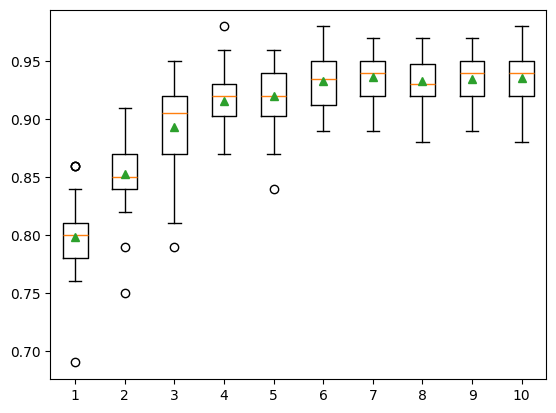

In [ ]:
def get_models():
  models=dict()
  for i in range (1,11):
    base=DecisionTreeClassifier(max_depth=i)
    models[str(i)]=AdaBoostClassifier(estimator=base)
  return models

def evaluate_model(model,X,y):
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores=cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
  return scores

X,y=get_dataset()
models=get_models()
results,names=list(),list()
for name,model in models.items():
  scores=evaluate_model(model,X,y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name,mean(scores),std(scores)))
pyplot.boxplot(results,labels=names,showmeans=True)
pyplot.show()

with learning rate

In [ ]:
def get_dataset():
  X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
  return X,y

>0.100 0.753 (0.051)
>0.200 0.763 (0.047)
>0.300 0.779 (0.044)
>0.400 0.781 (0.042)
>0.500 0.789 (0.042)
>0.600 0.790 (0.041)
>0.700 0.790 (0.040)
>0.800 0.795 (0.047)
>0.900 0.800 (0.038)
>1.000 0.798 (0.034)
>1.100 0.793 (0.039)
>1.200 0.792 (0.033)
>1.300 0.788 (0.035)
>1.400 0.791 (0.035)
>1.500 0.789 (0.032)
>1.600 0.786 (0.040)
>1.700 0.777 (0.045)
>1.800 0.764 (0.032)
>1.900 0.757 (0.040)
>2.000 0.674 (0.039)


<ipython-input-19-cc69b6baf5cb>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results,labels=names,showmeans=True)


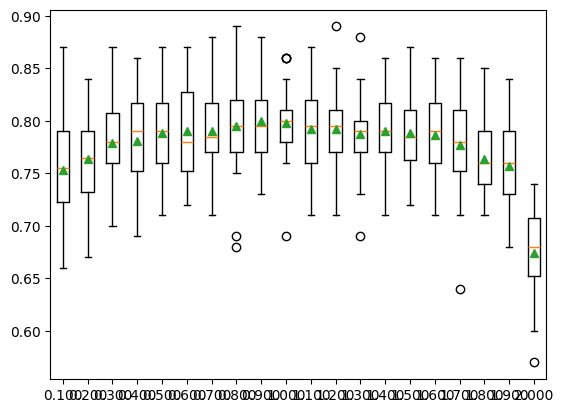

In [ ]:
def get_models():
  models=dict()
  for i in np.arange(0.1,2.1,0.1):
    key='%.3f'%i
    models[key]=AdaBoostClassifier(learning_rate=i)
  return models

def evaluate_model(model,X,y):
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores=cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
  return scores

X,y=get_dataset()
models=get_models()
results,names=list(),list()
for name,model in models.items():
  scores=evaluate_model(model,X,y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name,mean(scores),std(scores)))
pyplot.boxplot(results,labels=names,showmeans=True)
pyplot.show()

grid search cv


In [ ]:
from sklearn.model_selection import GridSearchCV
X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
model=AdaBoostClassifier()
grid=dict()
grid['n_estimators']= [10,50,100,500]
grid['learning_rate']= [0.0001,0.001,0.01,0.1,1.0]
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy')
grid_result = grid_search.fit(X,y)
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean , stdev , param in zip(means,stds,params):
  print("%f (%f) with: %r" % (mean,stdev,param))

Best: 0.811667 using {'learning_rate': 1.0, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.646333 (0.036376) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.645667 (0.036119) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.651333 (0.039811) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.644667 (0.036399) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.651333 (0.039811) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.683333 (0.053125) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.751667 (0.049267) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.709667 (0.054190) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.753000

#Regression

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostRegressor

X,y=make_regression(n_samples=1000,n_features=20,n_informative=15,noise=20,random_state=6)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=AdaBoostRegressor(n_estimators=50,learning_rate=1)
model.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=1)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

8945.07078518364


with base estimator linear regression and decision tree


In [ ]:
from sklearn.linear_model import LinearRegression
base_estimator=LinearRegression()
model=AdaBoostRegressor(n_estimators=50, estimator=base_estimator,learning_rate=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

442.3494636725658


In [ ]:
from sklearn.tree import DecisionTreeRegressor
base_estimator=DecisionTreeRegressor()
model=AdaBoostRegressor(n_estimators=50, estimator=base_estimator,learning_rate=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

7908.398688362151


learning rate for regression


LR=0.10, MSE=8307.089
LR=0.20, MSE=7172.914
LR=0.30, MSE=6442.108
LR=0.40, MSE=6078.283
LR=0.50, MSE=5800.018
LR=0.60, MSE=5653.316
LR=0.70, MSE=5474.156
LR=0.80, MSE=5389.377
LR=0.90, MSE=5299.550
LR=1.00, MSE=5289.564
LR=1.10, MSE=5246.058
LR=1.20, MSE=5070.082
LR=1.30, MSE=5089.786
LR=1.40, MSE=4982.707
LR=1.50, MSE=4979.104
LR=1.60, MSE=4990.353
LR=1.70, MSE=4866.674
LR=1.80, MSE=4797.208
LR=1.90, MSE=4841.158
LR=2.00, MSE=4785.875


<ipython-input-28-2f46e18b4461>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_scores, labels=[f"{lr:.1f}" for lr in learning_rates], showmeans=True)


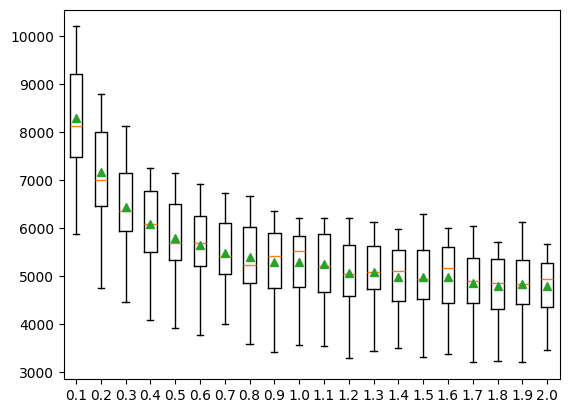

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=20, noise=20, random_state=6)

learning_rates = np.arange(0.1, 2.1, 0.1)

all_scores = []

for lr in learning_rates:
    model = AdaBoostRegressor(learning_rate=lr, n_estimators=100, random_state=1)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    mse_scores = -scores
    all_scores.append(mse_scores)
    print(f"LR={lr:.2f}, MSE={np.mean(mse_scores):.3f}")

plt.boxplot(all_scores, labels=[f"{lr:.1f}" for lr in learning_rates], showmeans=True)
plt.show()

grid search for regression


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
model = AdaBoostRegressor(random_state=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose=1)
grid_result = grid_search.fit(X, y)
print("Best MSE: %.3f using %s" % (-grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("MSE: %.3f (%.3f) with: %r" % (-mean, std, param))

Fitting 30 folds for each of 12 candidates, totalling 360 fits
Best MSE: 4910.461 using {'learning_rate': 1.0, 'n_estimators': 200}
MSE: 10953.186 (1602.253) with: {'learning_rate': 0.01, 'n_estimators': 50}
MSE: 10652.849 (1454.192) with: {'learning_rate': 0.01, 'n_estimators': 100}
MSE: 10204.974 (1449.410) with: {'learning_rate': 0.01, 'n_estimators': 200}
MSE: 9397.057 (1347.313) with: {'learning_rate': 0.1, 'n_estimators': 50}
MSE: 8307.089 (1140.410) with: {'learning_rate': 0.1, 'n_estimators': 100}
MSE: 7086.713 (988.604) with: {'learning_rate': 0.1, 'n_estimators': 200}
MSE: 6857.193 (901.973) with: {'learning_rate': 0.5, 'n_estimators': 50}
MSE: 5800.018 (833.890) with: {'learning_rate': 0.5, 'n_estimators': 100}
MSE: 5248.666 (735.881) with: {'learning_rate': 0.5, 'n_estimators': 200}
MSE: 5893.492 (774.290) with: {'learning_rate': 1.0, 'n_estimators': 50}
MSE: 5289.564 (655.643) with: {'learning_rate': 1.0, 'n_estimators': 100}
MSE: 4910.461 (648.479) with: {'learning_rate':

colab link:https://colab.research.google.com/drive/1kP2P5vpwAXsga5o0bQor_bdDDumU6nin?usp=sharing